In [1]:
import os
import docx2txt
import glob
import pandas as pd  
import re

In [2]:
Ctext = ''
for file in glob.glob('Canada interviews/*.docx'):
    Ctext += docx2txt.process(file)
print(Ctext)

M:	Okay, there you go. So that's recording now. Alright, so let's just begin with your first move to Canada. When did you first move to Canada?



Mi:	It was 24, August 2009. And I came up with study permit. My whole point was just to come here and get my education rather than settling here or having an immigration experience. So, I just wanted to focus on the education part.



M:	Okay, and what sort of program did you study?



Mi:	I took the post-secondary International Business program. So, it was a college program. And at the same time, it was a full-time study. So, during this program, I didn't have a chance to work, even though I had the chance to get the on campus work permit, but because of the timeframe, it was a really intense program. I didn't have a chance to work with doing this one year period.



M:	Okay, so and what were the motivations behind your move? Like what what did you consider in making the decision to move to Canada?



Mi:	So that's a good question actually.

In [33]:
fields = Ctext.split('\n')
print(fields)


["M:\tOkay, there you go. So that's recording now. Alright, so let's just begin with your first move to Canada. When did you first move to Canada?", '', '', '', 'Mi:\tIt was 24, August 2009. And I came up with study permit. My whole point was just to come here and get my education rather than settling here or having an immigration experience. So, I just wanted to focus on the education part.', '', '', '', 'M:\tOkay, and what sort of program did you study?', '', '', '', "Mi:\tI took the post-secondary International Business program. So, it was a college program. And at the same time, it was a full-time study. So, during this program, I didn't have a chance to work, even though I had the chance to get the on campus work permit, but because of the timeframe, it was a really intense program. I didn't have a chance to work with doing this one year period.", '', '', '', 'M:\tOkay, so and what were the motivations behind your move? Like what what did you consider in making the decision to mov

In [4]:
fields[0:10]

["M:\tOkay, there you go. So that's recording now. Alright, so let's just begin with your first move to Canada. When did you first move to Canada?",
 '',
 '',
 '',
 'Mi:\tIt was 24, August 2009. And I came up with study permit. My whole point was just to come here and get my education rather than settling here or having an immigration experience. So, I just wanted to focus on the education part.',
 '',
 '',
 '',
 'M:\tOkay, and what sort of program did you study?',
 '']

In [34]:
responseList = fields[1::]
print(responseList)

['', '', '', 'Mi:\tIt was 24, August 2009. And I came up with study permit. My whole point was just to come here and get my education rather than settling here or having an immigration experience. So, I just wanted to focus on the education part.', '', '', '', 'M:\tOkay, and what sort of program did you study?', '', '', '', "Mi:\tI took the post-secondary International Business program. So, it was a college program. And at the same time, it was a full-time study. So, during this program, I didn't have a chance to work, even though I had the chance to get the on campus work permit, but because of the timeframe, it was a really intense program. I didn't have a chance to work with doing this one year period.", '', '', '', 'M:\tOkay, so and what were the motivations behind your move? Like what what did you consider in making the decision to move to Canada?', '', '', '', "Mi:\tSo that's a good question actually. Not specifically Canada because I would like to start, I would like to back for

In [35]:
print(len(responseList))

3424


In [37]:
f = open("interviewdata.txt","w+")
f.write(Ctext)
f.close()

In [38]:
import pandas as pd

df = pd.read_csv("interviewdata.txt",delimiter=':', error_bad_lines=False)
df.to_csv('interviewdata.csv')


b'Skipping line 237: expected 2 fields, saw 3\nSkipping line 393: expected 2 fields, saw 3\nSkipping line 550: expected 2 fields, saw 3\nSkipping line 656: expected 2 fields, saw 3\nSkipping line 828: expected 2 fields, saw 3\nSkipping line 1102: expected 2 fields, saw 3\nSkipping line 1324: expected 2 fields, saw 3\nSkipping line 1594: expected 2 fields, saw 3\nSkipping line 1902: expected 2 fields, saw 3\nSkipping line 2198: expected 2 fields, saw 3\nSkipping line 2775: expected 2 fields, saw 3\nSkipping line 3135: expected 2 fields, saw 3\n'


In [39]:
rawData = open("interviewdata.csv").read()


In [40]:
import pandas as pd
idf = pd.read_csv('interviewdata.csv', index_col=0)

df[0:5]

,M,"Okay, there you go. So that's recording now. Alright, so let's just begin with your first move to Canada. When did you first move to Canada?"
0,Mi,"\tIt was 24, August 2009. And I came up with study permit. My whole point was just to come here ..."
1,M,"\tOkay, and what sort of program did you study?"
2,Mi,"\tI took the post-secondary International Business program. So, it was a college program. And at..."
3,M,"\tOkay, so and what were the motivations behind your move? Like what what did you consider in ma..."
4,Mi,"\tSo that's a good question actually. Not specifically Canada because I would like to start, I w..."


In [45]:
idf.columns = ['name','responses']
idf.head()

,name,responses
0,Mi,"\tIt was 24, August 2009. And I came up with study permit. My whole point was just to come here ..."
1,M,"\tOkay, and what sort of program did you study?"
2,Mi,"\tI took the post-secondary International Business program. So, it was a college program. And at..."
3,M,"\tOkay, so and what were the motivations behind your move? Like what what did you consider in ma..."
4,Mi,"\tSo that's a good question actually. Not specifically Canada because I would like to start, I w..."


In [46]:
idf = idf[idf.name != 'M']
idf.head()

,name,responses
0,Mi,"\tIt was 24, August 2009. And I came up with study permit. My whole point was just to come here ..."
2,Mi,"\tI took the post-secondary International Business program. So, it was a college program. And at..."
4,Mi,"\tSo that's a good question actually. Not specifically Canada because I would like to start, I w..."
6,Mi,"\tAustria. So it was the year was 2008. So, the year after, I definitely wanted to have a chance..."
8,Mi,"\tI am Turkish I was born in Turkey and raised in Turkey till 21-year-old. And after 21, I went ..."


In [47]:
idf = idf[idf['responses'].notna()]
len(idf)

409

In [48]:
#Generating csvs based on interview themes (iter 2)

pd.set_option('display.max_colwidth', 100)

#Arrival

idf1 = idf[idf['responses'].str.contains("arrival|entry|enter|airport|landing|departure")]
len(idf1)

36

In [49]:
#Aspiration

idf2 = idf[idf['responses'].str.contains("hope|aspire|ambition|wish|goal|aim|desire")]
len(idf2)

26

In [50]:
#Cost

idf3 = idf[idf['responses'].str.contains("cost|money|expense|price|fee|amount|value")]
len(idf3)

105

In [51]:
#Decision

idf4 = idf[idf['responses'].str.contains("decision|contemplate|think|advice|option|recommendation|suggestion|choice|selection|decide|determine")]
len(idf4)

215

In [52]:
#Affect

idf5 = idf[idf['responses'].str.contains("affect|effect|feeling|emotion|love|loss|sentiment|instinct|intuition|stress|worry|happy|reaction")]
len(idf5)

76

In [53]:
#Planning

idf6 = idf[idf['responses'].str.contains("plan|idea|strategy|schedule|scheme|organize|arrange|target|change|update|track|record")]
len(idf6)

95

In [54]:
#Skills

idf7 = idf[idf['responses'].str.contains("skill|expertise|experience|career|profession|occupation|knowledge|language|employment")]
len(idf7)

107

In [55]:
#Space

idf8 = idf[idf['responses'].str.contains("space|place|city|suburb|province|region|forum|online|street|road|transport|distance|location|map|time|infrastructure")]
len(idf8)

220

In [17]:
import csv
with open("i_space", "w") as _file:
    writer = csv.writer(_file)
    writer.writerow(idf8.columns.values)
    for index, row in idf8.iterrows():
        writer.writerow(row)

In [4]:
Atext = ''
for file in glob.glob('Australia interviews/*.docx'):
    Atext += docx2txt.process(file)
print(Atext)

M:	Can you tell me when you first migrated to Australia?



Ma:	I migrated last year in September. 



M:	What were the motivations behind your decision?



Ma:	The main motivation was, like, I wanted to challenge myself. I mean.. Ive been working for 12 years – always in India, or was in middle east for a year. In 2017 I happened to go to UK for a while and then when I came back, and when I wanted to go back to UK, somehow it didn’t end up working out with my employers and then I had a friend over here in Australia. I spoke to them and he was like, give it a shot. If it works out, it works out. I don’t want it to be a situation where in 5 years down the line I’d be thinking – I had an opportunity or I had a chance, and I didn’t take it. So that was one of the reasons. The other motivation was like.. so being married for like 5 years, I was sort of thinking if we plan a family, or whenever we start planning a family, if we have a base in a secure or better environment, well get good be

In [8]:
fields2 = Atext.split('\n')
print(fields2)

['M:\tCan you tell me when you first migrated to Australia?', '', '', '', 'Ma:\tI migrated last year in September. ', '', '', '', 'M:\tWhat were the motivations behind your decision?', '', '', '', 'Ma:\tThe main motivation was, like, I wanted to challenge myself. I mean.. Ive been working for 12 years – always in India, or was in middle east for a year. In 2017 I happened to go to UK for a while and then when I came back, and when I wanted to go back to UK, somehow it didn’t end up working out with my employers and then I had a friend over here in Australia. I spoke to them and he was like, give it a shot. If it works out, it works out. I don’t want it to be a situation where in 5 years down the line I’d be thinking – I had an opportunity or I had a chance, and I didn’t take it. So that was one of the reasons. The other motivation was like.. so being married for like 5 years, I was sort of thinking if we plan a family, or whenever we start planning a family, if we have a base in a secu

In [9]:
responseList2 = fields2[1::]
print(responseList2)

['', '', '', 'Ma:\tI migrated last year in September. ', '', '', '', 'M:\tWhat were the motivations behind your decision?', '', '', '', 'Ma:\tThe main motivation was, like, I wanted to challenge myself. I mean.. Ive been working for 12 years – always in India, or was in middle east for a year. In 2017 I happened to go to UK for a while and then when I came back, and when I wanted to go back to UK, somehow it didn’t end up working out with my employers and then I had a friend over here in Australia. I spoke to them and he was like, give it a shot. If it works out, it works out. I don’t want it to be a situation where in 5 years down the line I’d be thinking – I had an opportunity or I had a chance, and I didn’t take it. So that was one of the reasons. The other motivation was like.. so being married for like 5 years, I was sort of thinking if we plan a family, or whenever we start planning a family, if we have a base in a secure or better environment, well get good benefits out of it. A

In [12]:
x = open("Ainterviewdata.txt","w+")
x.write(Atext)
x.close()

In [14]:
import pandas as pd

Adf = pd.read_csv("Ainterviewdata.txt",delimiter=':', error_bad_lines=False)
Adf.to_csv('Ainterviewdata.csv')



b'Skipping line 230: expected 2 fields, saw 4\nSkipping line 296: expected 2 fields, saw 3\nSkipping line 362: expected 2 fields, saw 3\nSkipping line 580: expected 2 fields, saw 3\nSkipping line 640: expected 2 fields, saw 3\nSkipping line 766: expected 2 fields, saw 3\nSkipping line 1046: expected 2 fields, saw 3\nSkipping line 1202: expected 2 fields, saw 3\nSkipping line 1321: expected 2 fields, saw 3\nSkipping line 1551: expected 2 fields, saw 3\nSkipping line 1771: expected 2 fields, saw 3\nSkipping line 2021: expected 2 fields, saw 3\nSkipping line 2298: expected 2 fields, saw 3\nSkipping line 2476: expected 2 fields, saw 3\nSkipping line 2638: expected 2 fields, saw 3\nSkipping line 2784: expected 2 fields, saw 3\nSkipping line 2820: expected 2 fields, saw 4\n'


In [15]:
rawData2 = open("Ainterviewdata.csv").read()



In [16]:
Aidf = pd.read_csv('Ainterviewdata.csv', index_col=0)

Aidf[0:5]

,M,Can you tell me when you first migrated to Australia?
0,Ma,\tI migrated last year in September.
1,M,\tWhat were the motivations behind your decision?
2,Ma,"\tThe main motivation was, like, I wanted to c..."
3,M,\tThat’s very quick. What pathway did you take...
4,Ma,\tIt was skilled migration. So when we started...


In [18]:
Aidf.columns = ['name','responses']
Aidf.head()

,name,responses
0,Ma,\tI migrated last year in September.
1,M,\tWhat were the motivations behind your decision?
2,Ma,"\tThe main motivation was, like, I wanted to c..."
3,M,\tThat’s very quick. What pathway did you take...
4,Ma,\tIt was skilled migration. So when we started...


In [19]:
Aidf = Aidf[Aidf.name != 'M']
Aidf.head()

,name,responses
0,Ma,\tI migrated last year in September.
2,Ma,"\tThe main motivation was, like, I wanted to c..."
4,Ma,\tIt was skilled migration. So when we started...
6,Ma,"\tI am basically, you can say a BI Analytics g..."
8,Ma,"\tSo like, for example with an Indian passport..."


In [20]:
Aidf = Aidf[Aidf['responses'].notna()]
len(Aidf)

352

In [21]:
#Generating csvs based on interview themes (iter 2)

pd.set_option('display.max_colwidth', 100)

#Arrival

Aidf1 = Aidf[Aidf['responses'].str.contains("arrival|entry|enter|airport|landing|departure")]
len(Aidf1)

18

In [23]:
#Aspiration

Aidf2 = Aidf[Aidf['responses'].str.contains("hope|aspire|ambition|wish|goal|aim|desire")]
len(Aidf2)

5

In [22]:
#Cost

Aidf3 = Aidf[Aidf['responses'].str.contains("cost|money|expense|price|fee|amount|value")]
len(Aidf3)

103

In [24]:
#Decision

Aidf4 = Aidf[Aidf['responses'].str.contains("decision|contemplate|think|advice|option|recommendation|suggestion|choice|selection|decide|determine")]
len(Aidf4)

226

In [25]:
#Affect

Aidf5 = Aidf[Aidf['responses'].str.contains("affect|effect|feeling|emotion|love|loss|sentiment|instinct|intuition|stress|worry|happy|reaction")]
len(Aidf5)

64

In [27]:
#Planning

Aidf6 = Aidf[Aidf['responses'].str.contains("plan|idea|strategy|schedule|scheme|organize|arrange|target|change|update|track|record")]
len(Aidf6)

90

In [28]:
#Skills

Aidf7 = Aidf[Aidf['responses'].str.contains("skill|expertise|experience|career|profession|occupation|knowledge|language|employment")]
len(Aidf7)

111

In [29]:
#Space

Aidf8 = Aidf[Aidf['responses'].str.contains("space|place|city|suburb|province|region|forum|online|street|road|transport|distance|location|map|time|infrastructure")]
len(Aidf8)

200

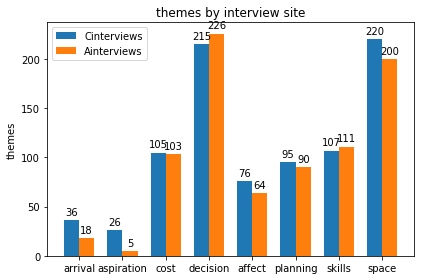

In [58]:
Cinterviews = [len(idf1), len(idf2), len(idf3), len(idf4), len(idf5), len(idf6), len(idf7), len(idf8)]
#print(Cinterviews)
Ainterviews = [len(Aidf1), len(Aidf2), len(Aidf3), len(Aidf4), len(Aidf5), len(Aidf6), len(Aidf7), len(Aidf8)]
themes = ['arrival', 'aspiration', 'cost', 'decision', 'affect', 'planning', 'skills', 'space']

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['arrival', 'aspiration', 'cost', 'decision', 'affect', 'planning', 'skills', 'space']
Cinterviews = [len(idf1), len(idf2), len(idf3), len(idf4), len(idf5), len(idf6), len(idf7), len(idf8)]
Ainterviews = [len(Aidf1), len(Aidf2), len(Aidf3), len(Aidf4), len(Aidf5), len(Aidf6), len(Aidf7), len(Aidf8)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Cinterviews, width, label='Cinterviews')
rects2 = ax.bar(x + width/2, Ainterviews, width, label='Ainterviews')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('themes')
ax.set_title('themes by interview site')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()